In [1]:
# First a few imports
import numpy as np
import matplotlib.pyplot as pl

# Question 1

In [10]:
# Sample n points in the complex square
initial_points = []
zi = []
for i in range(100):
    zi.append([0])
    random_1 = np.random.uniform(low = -2.0, high = 2.0)
    random_2 = np.random.uniform(low = -2.0, high = 2.0)
    initial_points.append(random_1+random_2*1j)

In [11]:
def iterate(initial_points, zi):
    # Function that takes a point list and the zi list
    # and iterates all points using the equation z_i+1 = z_i^2+c
    
    for k in range(len(initial_points)):
        zi_next = (zi[k][-1])*(zi[k][-1])+initial_points[k]
        zi[k].append(zi_next)
    
    return zi

In [12]:
# Iterate over 5 steps
for i in range(20):
    iterate(initial_points, zi)

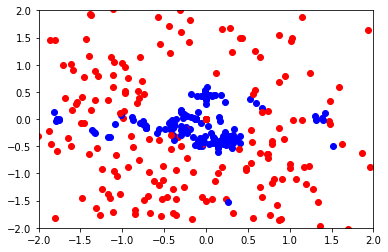

In [14]:
pl.figure()
for i in range(len(initial_points)):
    if abs(zi[i][-1]) < 100:
        color = 'blue'
    else:
        color = 'red'
    pl.scatter(np.real(zi[i]), np.imag(zi[i]), color = color)
pl.xlim(-2,2)
pl.ylim(-2,2)
pl.savefig('question1_1.png')
pl.show()

Let's do this again for the box -0.1<x<0.1 and -0.1<y<0.1

In [17]:
# Sample n points in the complex square
initial_points_2 = []
zi_2 = []
for i in range(100):
    zi_2.append([0])
    random_1 = np.random.uniform(low = -0.1, high = 0.1)
    random_2 = np.random.uniform(low = -0.1, high = 0.1)
    initial_points_2.append(random_1+random_2*1j)

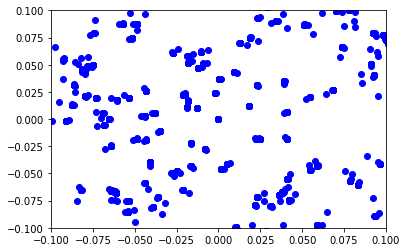

In [18]:
# Iterate over 5 steps
for i in range(20):
    iterate(initial_points_2, zi_2)
pl.figure()
for i in range(len(initial_points_2)):
    if abs(zi_2[i][-1]) < 100:
        color = 'blue'
    else:
        color = 'red'
    pl.scatter(np.real(zi_2[i]), np.imag(zi_2[i]), color = color)
pl.xlim(-0.1,0.1)
pl.ylim(-0.1,0.1)
pl.savefig('question1_2.png')
pl.show()

They all converge! Wow!

# Question 2

In [41]:
# We need scipy for this
from scipy.integrate import odeint

In [59]:
def derivatives(vector, t, beta, gamma, N):
    S, I, R = vector
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N -gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

In [60]:
def ODE_solver(gamma, beta):
    N=1000
    init_vector = 999,1,0
    time = np.linspace(0,200,200)
    final_results = odeint(derivatives, init_vector, time, args=(beta, gamma, N))
    return final_results

In [74]:
result1 = ODE_solver(0.1,0.2).T
result2 = ODE_solver(0.2,0.2).T
result3 = ODE_solver(0.1,0.8).T
time = np.linspace(0,200,200)

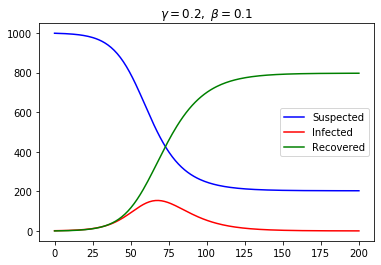

In [75]:
pl.figure()
pl.title(r'$\gamma = 0.2, \ \beta = 0.1$')
pl.plot(time, result1[0], color = 'blue')
pl.plot(time, result1[1], color = 'red')
pl.plot(time, result1[2], color = 'green')
pl.legend(['Suspected', 'Infected', 'Recovered'])
pl.savefig('question2_1')
pl.show()

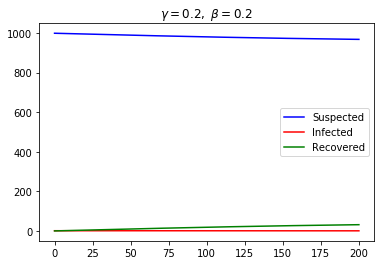

In [76]:
pl.figure()
pl.title(r'$\gamma = 0.2, \ \beta = 0.2$')
pl.plot(time, result2[0], color = 'blue')
pl.plot(time, result2[1], color = 'red')
pl.plot(time, result2[2], color = 'green')
pl.legend(['Suspected', 'Infected', 'Recovered'])
pl.savefig('question2_2')
pl.show()

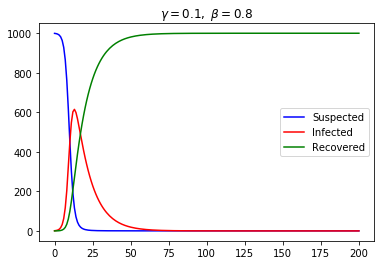

In [71]:
pl.figure()
pl.title(r'$\gamma = 0.1, \ \beta = 0.8$')
pl.plot(time, result3[0], color = 'blue')
pl.plot(time, result3[1], color = 'red')
pl.plot(time, result3[2], color = 'green')
pl.legend(['Suspected', 'Infected', 'Recovered'])
pl.savefig('question2_1')
pl.show()

# Bonus
We want the rate of death to be proportionnal to the number of infected and we want to subtract the deaths to the infected count. Something like this could work:
$$\frac{dD}{dt} = \alpha I$$
$$\frac{dI}{dt} = \frac{\beta SI}{N}-(\gamma+\alpha)I$$

In [81]:
def derivatives_bonus(vector, t, beta, gamma, alpha, N):
    S, I, R, D = vector
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - (gamma+alpha)*I
    dRdt = gamma*I
    dDdt = alpha*I
    return dSdt, dIdt, dRdt, dDdt
def ODE_solver_bonus(gamma, beta, alpha):
    N=1000
    init_vector = 999,1,0,0
    time = np.linspace(0,200,200)
    final_results = odeint(derivatives_bonus, init_vector, time, args=(beta, gamma, alpha, N))
    return final_results

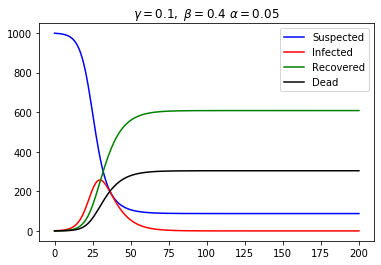

In [95]:
result1_bonus = ODE_solver_bonus(0.1, 0.4, 0.05).T
pl.figure()
pl.title(r'$\gamma = 0.1, \ \beta = 0.4 \ \alpha = 0.05$')
pl.plot(time, result1_bonus[0], color = 'blue')
pl.plot(time, result1_bonus[1], color = 'red')
pl.plot(time, result1_bonus[2], color = 'green')
pl.plot(time, result1_bonus[3], color = 'black')
pl.legend(['Suspected', 'Infected', 'Recovered', 'Dead'])
pl.show()